In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate

#### 1. (Teórico)
Se tiene que 
$$f(x) = \sum_{n=0}^{\infty} C_n P_n(x)$$
Multipliquemos por un $P_m(x)$ a lado y lado de la expresión e integremos a cada lado:
$$\int_{-1}^{1} f(x)P_m(x) dx = \int_{-1}^{1} \sum_{n=0}^{\infty} C_n P_n(x)P_m(x)dx$$
$$\int_{-1}^{1} f(x)P_m(x) dx =  \sum_{n=0}^{\infty}C_n \int_{-1}^{1} P_n(x)P_m(x)dx$$
Por ortogonalidad: 
$$\int_{-1}^{1} f(x)P_m(x) dx =  \frac{2}{2n+1}\sum_{n=0}^{\infty}C_n \delta_{n,m}$$
$$\int_{-1}^{1} f(x)P_m(x) dx =  C_n \frac{2}{2n+1}$$
$$\therefore C_n = \frac{2n+1}{2}\int_{-1}^{1} f(x)P_m(x) dx$$

In [2]:
def sgn(x):
    if x<0:
        return -1
    elif x==0:
        return 0
    elif x>0:
        return 1

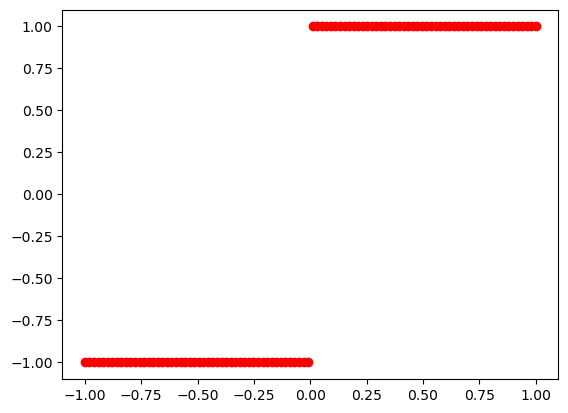

In [3]:
X = np.linspace(-1,1,100)
Y = np.zeros(100)
for i in range(len(X)):
    Y[i] = sgn(X[i])

plt.scatter(X,Y,color='r')

In [4]:
roots, weights = np.polynomial.legendre.leggauss(15)
print(roots, weights)

[-0.98799252 -0.93727339 -0.84820658 -0.72441773 -0.57097217 -0.39415135
 -0.20119409  0.          0.20119409  0.39415135  0.57097217  0.72441773
  0.84820658  0.93727339  0.98799252] [0.03075324 0.07036605 0.10715922 0.13957068 0.16626921 0.186161
 0.19843149 0.20257824 0.19843149 0.186161   0.16626921 0.13957068
 0.10715922 0.07036605 0.03075324]


In [5]:
def GetLegendre(n,x):
    y = (x**2 - 1)**n
    poly = sym.diff( y,x,n )/(2**n * np.math.factorial(n))
    return poly

In [79]:
x = sym.Symbol('x')
N = 21
poly = []
for i in range(N):
    poly.append(GetLegendre(i,x))
    
poly

[1,
 x,
 (3*x**2 - 1)/2,
 x*(5*x**2 - 3)/2,
 (8*x**4 + 24*x**2*(x**2 - 1) + 3*(x**2 - 1)**2)/8,
 x*(8*x**4 + 40*x**2*(x**2 - 1) + 15*(x**2 - 1)**2)/8,
 (16*x**6 + 120*x**4*(x**2 - 1) + 90*x**2*(x**2 - 1)**2 + 5*(x**2 - 1)**3)/16,
 x*(16*x**6 + 168*x**4*(x**2 - 1) + 210*x**2*(x**2 - 1)**2 + 35*(x**2 - 1)**3)/16,
 (128*x**8 + 1792*x**6*(x**2 - 1) + 3360*x**4*(x**2 - 1)**2 + 1120*x**2*(x**2 - 1)**3 + 35*(x**2 - 1)**4)/128,
 x*(128*x**8 + 2304*x**6*(x**2 - 1) + 6048*x**4*(x**2 - 1)**2 + 3360*x**2*(x**2 - 1)**3 + 315*(x**2 - 1)**4)/128,
 (256*x**10 + 5760*x**8*(x**2 - 1) + 20160*x**6*(x**2 - 1)**2 + 16800*x**4*(x**2 - 1)**3 + 3150*x**2*(x**2 - 1)**4 + 63*(x**2 - 1)**5)/256,
 x*(256*x**10 + 7040*x**8*(x**2 - 1) + 31680*x**6*(x**2 - 1)**2 + 36960*x**4*(x**2 - 1)**3 + 11550*x**2*(x**2 - 1)**4 + 693*(x**2 - 1)**5)/256,
 (1024*x**12 + 33792*x**10*(x**2 - 1) + 190080*x**8*(x**2 - 1)**2 + 295680*x**6*(x**2 - 1)**3 + 138600*x**4*(x**2 - 1)**4 + 16632*x**2*(x**2 - 1)**5 + 231*(x**2 - 1)**6)/1024,
 x

Teniendo en cuenta que
$$C_n = \frac{2n+1}{2}\int_{-1}^{1}f(x)P_n(x) dx$$
Se puede evaluar la función $sgn(x)$:
$$\implies C_n = \frac{2n+1}{2}\left(\int_{-1}^{0}(-1)P_n(x) dx + \int_{0}^{1}(1)P_n(x) dx\right)$$

Haciendo eso en código:

In [80]:
def Ci (N):
    Cn = []
    for i in range(N):
        pn = sym.lambdify([x], poly[i], 'numpy')
        I1 = -integrate.quad(pn,-1,0)[0]
        I2 = integrate.quad(pn,0,1)[0]
        Cn.append((2*i+1)*(I1+I2)/2)
    return np.array(Cn)

Cn=Ci(N)
Cn

array([ 0.        ,  1.5       ,  0.        , -0.875     ,  0.        ,
        0.6875    ,  0.        , -0.5859375 ,  0.        ,  0.51953125,
        0.        , -0.47167969,  0.        ,  0.43505859,  0.        ,
       -0.40585327,  0.        ,  0.3818512 ,  0.        , -0.36166763,
        0.        ])

In [98]:
def suma(X):
    Sum=0
    for i in range(len(poly)):
        pi = GetLegendre(i,x),
        pn = sym.lambdify([x], pi,'numpy')
        Sum+=Cn[i]*pn(X)
    return Sum


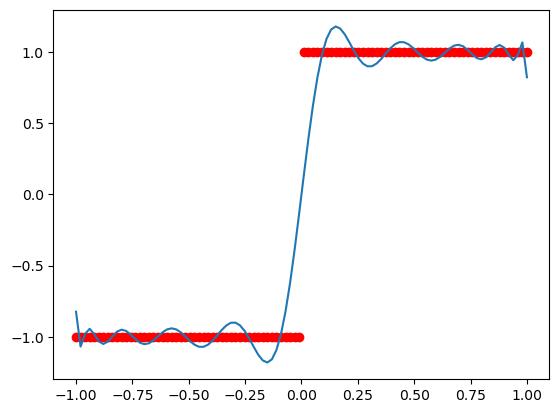

In [101]:
X = np.linspace(-1,1,100)
XL = np.linspace(-1,1,100)

Y = np.zeros(100)
YL = np.zeros(100)

for i in range(len(X)):
    Y[i] = sgn(X[i])
    YL[i] = suma(XL[i])

plt.scatter(X,Y,color='r')
plt.plot(XL,YL)